# Classifiers

by Linh Van Nguyen <contact@linhvannguyen.com>

as a part of the demonstration galeries for <a href='http://scikit-learn.org/stable/'>sklearn</a> Machine Learning python package.

------------

This note demonstrates the comparison of a several classifiers in scikit-learn on synthetic datasets. The point of this example is to illustrate the nature of decision boundaries of different classifiers. Note that these examples are not necessarily assured working with real datasets. Concetely, data lies in high-dimensional spaces can be easily classified linearly. In such case, simple classifiers such as naive Bayes and linear SVMs might lead to better generalization than is achieved by other classifiers.

This notebook includes:
* <a href='#part1'>Part 1: Warming up</a>
    * <a href='#sec1'> Define plotting functions</a>
    * <a href='#sec2'> Synthesized datasets</a>
* <a href='#part2'>Part 2: Various classifiers</a>
    * <a href='#sec3'>1. Nearest Neighbors (NN)</a>
    * <a href='#sec4'>2. Support Vector Machine (SVM)</a>
    * <a href='#sec5'>3. Decision Tree</a>
    * <a href='#sec6'>4. Random Forest</a>
    * <a href='#sec7'>5. AdaBoost</a>
    * <a href='#sec8'>6. Bayesian Naive</a>
    * <a href='#sec9'>7. Linear Discriminant Analysis (LDA)</a>
    * <a href='#sec10'>8. Quadratic Discriminant Analysis (QLA)</a>

## Part 1: Warming up <a id='part1'></a>

### Define plotting functions <a id='sec1'></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_onedataset(ax, ds, name):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)    
    return X_train, X_test, y_train, y_test, xx, yy;

def plot_alldatasets(datasets,datasets_names):
    # Plot all 3 datasets
    figure = plt.figure(figsize=(14, 4))
    # iterate over datasets
    i = 1
    for ds, name in zip(datasets,dataset_names):    
        ax = plt.subplot(1,len(datasets), i)
        plot_onedataset(ax, ds, name)
        i += 1
    plt.show()


def plot_oneclf_onedataset(ax, ds, name, clf):
    X_train, X_test, y_train, y_test, xx, yy = plot_onedataset(ax, ds, name)
        
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    
    return;

def plot_oneclf_alldatasets(datasets, dataset_names, clf):
    figure = plt.figure(figsize=(14, 4))
    # iterate over datasets
    i = 1
    for ds, name in zip(datasets,dataset_names):
        ax = plt.subplot(1,len(datasets), i)
        plot_oneclf_onedataset(ax, ds, name,clf)
        i += 1
    plt.show()

### Synthesized datasets <a id='sec2'></a>

We consider here 3 different synthesizes datasets:
* *sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)*: 

The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

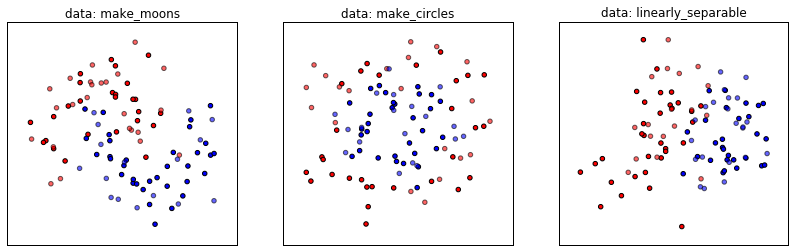

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

h = .02  # step size in the mesh

# Create linearly separable data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# 3 testing datasets
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]
dataset_names = ['data: make_moons', 'data: make_circles', 'data: linearly_separable']


# Plot all 3 datasets
plot_alldatasets(datasets, dataset_names)

## Part 2: Various classifiers <a id='part2'></a>

### 1. Nearest Neighbors (NN) <a id='sec3'></a>

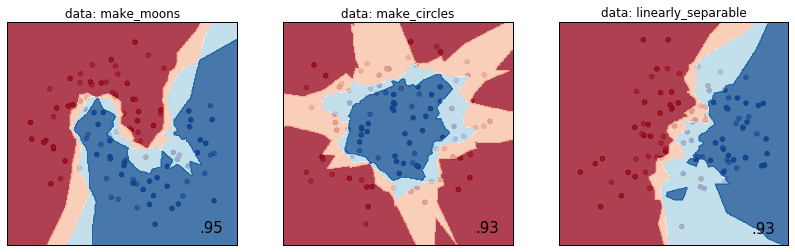

In [3]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(3)

plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 2.  Support Vector Machine (SVM) <a id='sec4'></a>

#### Linear SVM

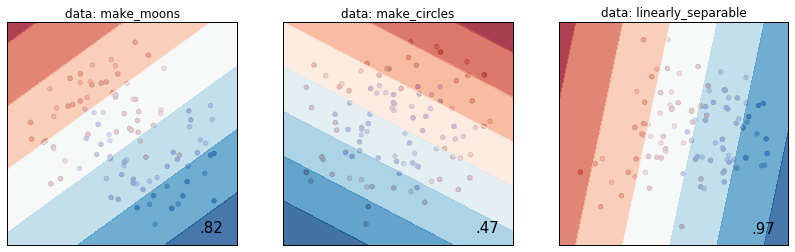

In [4]:
from sklearn.svm import SVC
clf = SVC(kernel="linear", C=0.025)
plot_oneclf_alldatasets(datasets, dataset_names, clf)

#### Radial Basis Function (RBF) SVM

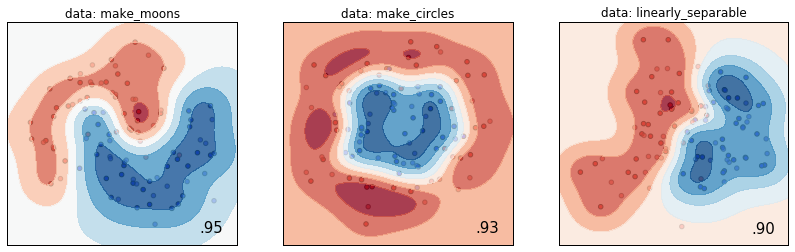

In [5]:
from sklearn.svm import SVC
clf = SVC(gamma=2, C=1)
plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 3. Decision Tree <a id='sec5'></a>

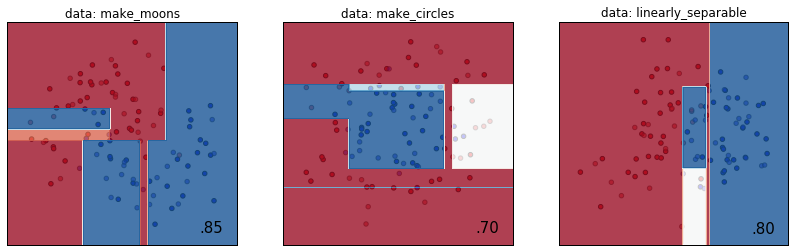

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 4. Random Forest <a id='sec6'></a>

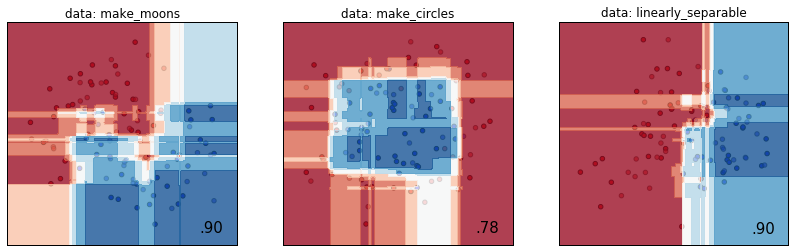

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 5. AdaBoost <a id='sec7'></a>

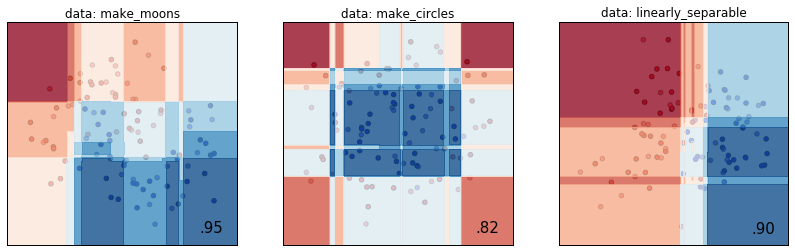

In [8]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 6. Bayesian Naive <a id='sec8'></a>

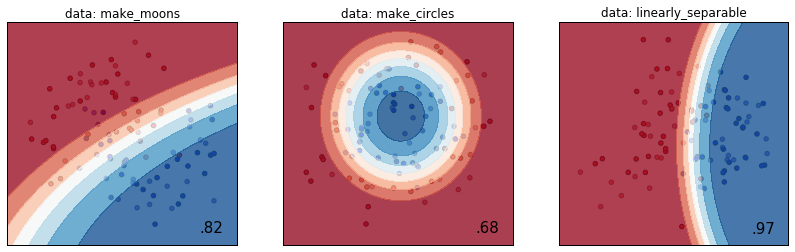

In [9]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 7. Linear Discriminant Analysis (LDA) <a id='sec9'></a>

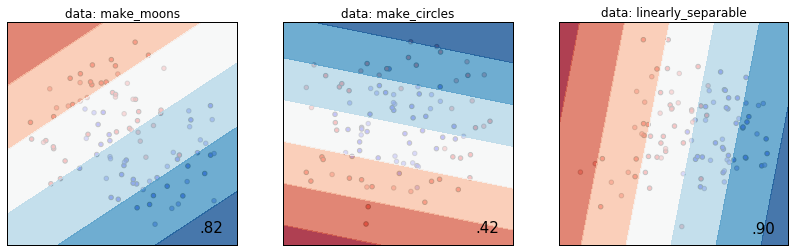

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
plot_oneclf_alldatasets(datasets, dataset_names, clf)

### 8. Quadratic Discriminant Analysis (QLA)<a id='sec10'></a>

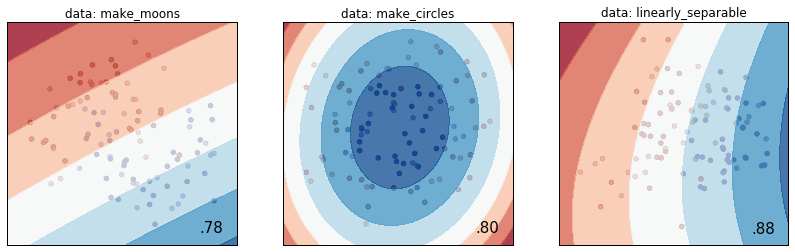

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
plot_oneclf_alldatasets(datasets, dataset_names, clf)